# Neural Network Maths
> Basic fundamentals of machine learning 

- toc: true 
- badges: true
- comments: true
- use_math: true
- categories: [Machine Learning; Neural Networks]

![](ghtop_images/header2.png)

In [134]:
#hide
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Gradient Descent

Gradient descent is an algroithm used to determine the value of parameters that are used to map input variables to target variables.
The steps are:
- Determine a loss function that relates predictions and actual values, i.e. a function that determines how good the predictions are 
    - N.B. the function needs to be of a form to encourage gradient descent
- Find the gradient of the loss function with respect to the parameters
- Update the weights based on this gradient 

For example, in the figure below 
- if the weight W=0 then the Loss is 1 and the gradient is -1.0. In this case we'd want to increase the value of the weight W towards it's minimum 0.5
- if the weight W=1 then the Loss is also 1 but the gradient is +1.0. In this case we'd want to reduce the value of the weight W towards it's minimum 0.5
- if the weight W=0.5 then the loss is close 0 and so is the garient, in this case we wouldn't want to change the weights by much

i.e. the weights can be updated by a formula of the form below to get the best fit:

$$W_{i+1} = W_i - const . \frac{dJ}{dW}$$

> Gradient descent is not the only optimisation method to determine parameters but is an easy one to understand.

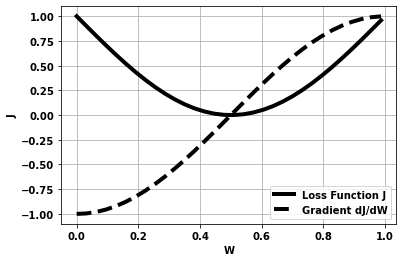

In [167]:
#hide-input
xx=np.arange(0,np.pi,.1)
plt.plot(xx/np.pi,1+np.sin(-xx),'-k',linewidth=4)
plt.plot(xx/np.pi,-np.cos(-xx),'k--',linewidth=4)
plt.legend(['Loss Function J','Gradient dJ/dW'])
plt.xlabel('W')
plt.ylabel('J')
plt.grid(True)


Some definitions. 

- `X` are the input variables
- `Y` the target variables 
- $\hat{y}$ is the prediction
- The loss function `J` is what we are trying to minimise and is the sum of ${Y-\hat{y}^2}$. For simplicity we'll remove the summation below.
- `m` and `b` are the parameters we are looking to obtain


$\hat{Y}= mX +b$

$Error = \hat{Y} - Y$

$J(m,b) = Error^2$

$Error = mX + b - Y$

What we want to do is update `m` and `b` so that `J` is reduced and the predictions is better. That is for `m` we obtain a new value (1) from the previous one (0) as follows:

$m_1 = m_0 - \frac{dJ}{dm} . \alpha$

Where we have also included a learning rate ($\alpha$<1) to make the changes smoother.

So to improve the predictions of the model we need to find \frac{dJ}{dm} and \frac{dJ}{db}. Which involves a bit of differentiation and rearanging as follows.


Chain rule for differentiation to find `db` and `dm`

$\frac{dJ}{dm}\ = \frac{dJ}{dError}\ \frac{dError}{dm}$

$\frac{dJ}{db}\ = \frac{dJ}{dError}\ \frac{dError}{db}$


from definition of J

$\frac{dJ}{dError}\ = 2 . Error$

from definition of Error

$\frac{dError}{dm} = X$

$\frac{dError}{db} = 1$


So 

$\frac{dJ}{dm} = 2 . Error . X$

$\frac{dJ}{db} = 2 . Error . 1$

And to account for the summation we divide by the length of the array. 

To allow for matrix multiplication we create `X` as a matrix of two vectors one with just ones and the 2nd part the original X. This then allows us to have one variable for the weights `m` and `b` that we are fitting to. 

So for each iteration (`K`) the weights `W` (`j` are the different parts to the weights e.g. `b` and `m`) are updated. Noting that there are `N` observations (length of y is N) we get:

$W_j^{K+1} = W_j^{K} - [\alpha . \frac{1}{N}\sum(\hat{Y}-Y).X_j]$

In [135]:
def computeCost(X,y, theta):
    Ypred = np.matmul(X,theta)
    J =np.sum( (1/(2*len(y)))* (Ypred - y)**2 )
    return J,Ypred
def computeGrad(X, y, theta,learningRate):
    J,Ypred = computeCost(X,y, theta)
    error = (Ypred - y)*learningRate/len(y)
    return [np.sum(error),np.sum(X[:,1]*error)], J
    

Create the variables to fit to

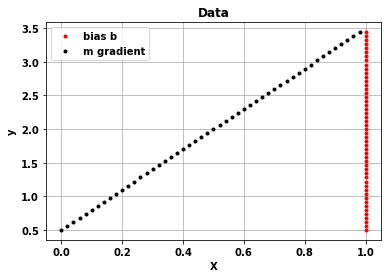

In [125]:
X = np.ones((50,2))
X[:,1]=np.arange(0,1,.02)
theta_act = [.5,3]
y = np.matmul(X,theta_act)
plt.plot(X[:,0],y,'.r')
plt.plot(X[:,1],y,'.k')
plt.grid(True)
plt.title('Data')
plt.legend(['bias b','m gradient']);
plt.xlabel('X')
plt.ylabel('y');

Use the gradient descent iteration

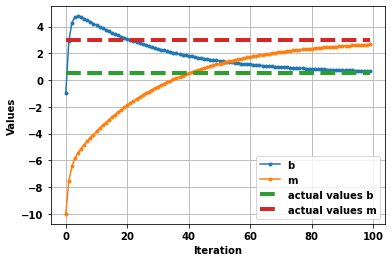

In [172]:
theta_=np.array([-1, -10])
thetaALL=[]; jALL=[]
iterTot=100
for _ in range(iterTot):
    thetaALL.append( theta_ )
    (deltaTheta, J) =computeGrad(X, y, theta_,learningRate=.5)
    theta_ = theta_ - deltaTheta
    
    jALL.append(J)

plt.plot(range(iterTot),thetaALL,'.-')
plt.plot(range(iterTot),np.ones((iterTot,2))*theta_act,'--',linewidth=4)
# plt.plot(range(iterTot),jALL,':',linewidth=4)
plt.grid(True)
plt.legend(['b','m','actual values b','actual values m','Loss'])
plt.xlabel('Iteration')
plt.ylabel('Values');

